In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier  

In [2]:
data = pd.read_csv("hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


In [4]:
data.dropna(inplace=True)
data.describe()

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000,2018.000000
mean,0.088206,19010.257681,76337.035183,106899.244797,9.003964,0.150149,0.264123,180.645020,1.037661,22.265114,34.105829
std,0.283665,10768.607345,44476.368189,54026.707096,7.573012,0.580421,0.789816,84.420116,1.578414,9.457238,8.438411
min,0.000000,1700.000000,5076.000000,23031.000000,0.000000,0.000000,0.000000,0.490000,0.000000,0.000000,4.030000
25%,0.000000,12000.000000,49577.250000,71287.250000,3.000000,0.000000,0.000000,118.205000,0.000000,16.000000,29.295500
50%,0.000000,16900.000000,67595.000000,94514.000000,7.000000,0.000000,0.000000,176.670000,0.000000,21.000000,34.949000
75%,0.000000,23600.000000,92922.750000,121220.750000,13.000000,0.000000,0.000000,229.692500,2.000000,27.000000,38.952000
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.230000,13.000000,64.000000,144.189000


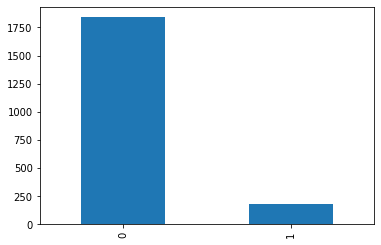

In [5]:
# counting the values of bad column
data['bad'].value_counts().plot.bar()

In [6]:
# creating dummy columns for categorical variables
dms = pd.get_dummies(data[['reason', 'job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [7]:
# dropping the categoricals and adding the dummies
X_ = data.drop(['bad', 'reason', 'job'],axis=1)
X = pd.concat([X_, dms[["reason_DebtCon", "job_Mgr","job_Office","job_ProfEx","job_Sales","job_Self"]]], axis = 1)

In [8]:
# splitting the data as train and test
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
y = data["bad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1614, 16), (1614,), (404, 16), (404,))

## Decision Tree Classifier

In [9]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
# accuracy of the model
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9356435643564357

In [11]:
# cross validation for our model
cart_grid = {"max_depth":range(1,10), "min_samples_split":list(range(2,50))}
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs =-1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 2006 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   12.0s finished


In [12]:
print('Best parameters : ' + str(cart_cv_model.best_params_))

Best parameters : {'max_depth': 9, 'min_samples_split': 3}


In [27]:
# cross validation ile bulunan en iyi parametrelerle yeni bir model kurulması. Bu parametrelerle en iyi sonuç alınacaktır.
cart = DecisionTreeClassifier(max_depth = 9, min_samples_split=3)
cart_tuned = cart.fit(X_train, y_train)
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)
# accuracy increased from 0.93 to 0.95

0.9504950495049505

In [28]:
# classification report
print(classification_report(y_test, y_pred))
# our model predicts 0s well in spite of 1's. Because in our data number of 0s are much more than 1s

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       369
           1       0.94      0.46      0.62        35

    accuracy                           0.95       404
   macro avg       0.95      0.73      0.79       404
weighted avg       0.95      0.95      0.94       404



## Random Forrest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
rf_model

C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9504950495049505

In [17]:
# cross validation
rf_params = {"max_depth":[2,5,8,10],"max_features":[2,5,8],"n_estimators":[10,500,1000],"min_samples_split":[2,5,10]}
rf_model = RandomForestClassifier()
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose = 5)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 265 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 391 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 553 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 751 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 985 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  3.8min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [18]:
print('Best parameters : ' + str(rf_cv_model.best_params_))

Best parameters : {'max_depth': 10, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}


In [29]:
# tuned model with best parameters
rf_tuned = RandomForestClassifier(max_depth= 10, max_features = 5, min_samples_split = 2, n_estimators = 500)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)
# accuracy didn't change. default parameters already are the best ones.

0.9455445544554455

In [31]:
print(classification_report(y_test, y_pred))
# our model's recall and f1 score decreased compared to decision tree classifier.

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       369
           1       1.00      0.37      0.54        35

    accuracy                           0.95       404
   macro avg       0.97      0.69      0.76       404
weighted avg       0.95      0.95      0.93       404



## Catboost

In [22]:
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier().fit(X_train, y_train)
cat_model

Learning rate set to 0.019185
0:	learn: 0.6727088	total: 99.1ms	remaining: 1m 39s
1:	learn: 0.6517088	total: 127ms	remaining: 1m 3s
2:	learn: 0.6323141	total: 156ms	remaining: 52s
3:	learn: 0.6117450	total: 186ms	remaining: 46.3s
4:	learn: 0.5932287	total: 219ms	remaining: 43.7s
5:	learn: 0.5768017	total: 248ms	remaining: 41.1s
6:	learn: 0.5606866	total: 278ms	remaining: 39.4s
7:	learn: 0.5465648	total: 311ms	remaining: 38.6s
8:	learn: 0.5303470	total: 342ms	remaining: 37.7s
9:	learn: 0.5154209	total: 372ms	remaining: 36.8s
10:	learn: 0.5031691	total: 405ms	remaining: 36.4s
11:	learn: 0.4905270	total: 435ms	remaining: 35.8s
12:	learn: 0.4779718	total: 463ms	remaining: 35.2s
13:	learn: 0.4655135	total: 495ms	remaining: 34.8s
14:	learn: 0.4542653	total: 523ms	remaining: 34.4s
15:	learn: 0.4427877	total: 555ms	remaining: 34.1s
16:	learn: 0.4323051	total: 588ms	remaining: 34s
17:	learn: 0.4228497	total: 619ms	remaining: 33.7s
18:	learn: 0.4133530	total: 648ms	remaining: 33.4s
19:	learn: 0.

160:	learn: 0.1663937	total: 4.9s	remaining: 25.5s
161:	learn: 0.1660672	total: 4.93s	remaining: 25.5s
162:	learn: 0.1657393	total: 4.97s	remaining: 25.5s
163:	learn: 0.1654918	total: 5.01s	remaining: 25.5s
164:	learn: 0.1652314	total: 5.04s	remaining: 25.5s
165:	learn: 0.1652010	total: 5.06s	remaining: 25.4s
166:	learn: 0.1650393	total: 5.09s	remaining: 25.4s
167:	learn: 0.1645549	total: 5.12s	remaining: 25.4s
168:	learn: 0.1638655	total: 5.16s	remaining: 25.3s
169:	learn: 0.1635770	total: 5.18s	remaining: 25.3s
170:	learn: 0.1633548	total: 5.21s	remaining: 25.3s
171:	learn: 0.1631028	total: 5.24s	remaining: 25.2s
172:	learn: 0.1626476	total: 5.27s	remaining: 25.2s
173:	learn: 0.1623925	total: 5.3s	remaining: 25.2s
174:	learn: 0.1618157	total: 5.33s	remaining: 25.1s
175:	learn: 0.1611503	total: 5.36s	remaining: 25.1s
176:	learn: 0.1606405	total: 5.39s	remaining: 25.1s
177:	learn: 0.1603745	total: 5.42s	remaining: 25.1s
178:	learn: 0.1601114	total: 5.46s	remaining: 25s
179:	learn: 0.15

319:	learn: 0.1323202	total: 9.55s	remaining: 20.3s
320:	learn: 0.1323005	total: 9.59s	remaining: 20.3s
321:	learn: 0.1320763	total: 9.62s	remaining: 20.3s
322:	learn: 0.1319341	total: 9.65s	remaining: 20.2s
323:	learn: 0.1316606	total: 9.68s	remaining: 20.2s
324:	learn: 0.1315006	total: 9.71s	remaining: 20.2s
325:	learn: 0.1312324	total: 9.74s	remaining: 20.1s
326:	learn: 0.1312285	total: 9.75s	remaining: 20.1s
327:	learn: 0.1309510	total: 9.78s	remaining: 20s
328:	learn: 0.1309133	total: 9.81s	remaining: 20s
329:	learn: 0.1306562	total: 9.84s	remaining: 20s
330:	learn: 0.1306277	total: 9.86s	remaining: 19.9s
331:	learn: 0.1305093	total: 9.89s	remaining: 19.9s
332:	learn: 0.1304132	total: 9.92s	remaining: 19.9s
333:	learn: 0.1301926	total: 9.95s	remaining: 19.8s
334:	learn: 0.1299900	total: 9.98s	remaining: 19.8s
335:	learn: 0.1298187	total: 10s	remaining: 19.8s
336:	learn: 0.1297057	total: 10s	remaining: 19.7s
337:	learn: 0.1296335	total: 10.1s	remaining: 19.7s
338:	learn: 0.1294234	

481:	learn: 0.1129500	total: 14.2s	remaining: 15.3s
482:	learn: 0.1129366	total: 14.2s	remaining: 15.2s
483:	learn: 0.1127434	total: 14.2s	remaining: 15.2s
484:	learn: 0.1126487	total: 14.3s	remaining: 15.2s
485:	learn: 0.1122879	total: 14.3s	remaining: 15.1s
486:	learn: 0.1122778	total: 14.3s	remaining: 15.1s
487:	learn: 0.1122561	total: 14.4s	remaining: 15.1s
488:	learn: 0.1122320	total: 14.4s	remaining: 15s
489:	learn: 0.1121419	total: 14.4s	remaining: 15s
490:	learn: 0.1119354	total: 14.4s	remaining: 15s
491:	learn: 0.1118799	total: 14.5s	remaining: 14.9s
492:	learn: 0.1117978	total: 14.5s	remaining: 14.9s
493:	learn: 0.1117942	total: 14.5s	remaining: 14.9s
494:	learn: 0.1117245	total: 14.6s	remaining: 14.9s
495:	learn: 0.1115946	total: 14.6s	remaining: 14.8s
496:	learn: 0.1114933	total: 14.6s	remaining: 14.8s
497:	learn: 0.1114527	total: 14.7s	remaining: 14.8s
498:	learn: 0.1112700	total: 14.7s	remaining: 14.7s
499:	learn: 0.1111252	total: 14.7s	remaining: 14.7s
500:	learn: 0.1110

645:	learn: 0.0931394	total: 18.9s	remaining: 10.3s
646:	learn: 0.0930210	total: 18.9s	remaining: 10.3s
647:	learn: 0.0929062	total: 18.9s	remaining: 10.3s
648:	learn: 0.0929008	total: 18.9s	remaining: 10.2s
649:	learn: 0.0928962	total: 19s	remaining: 10.2s
650:	learn: 0.0927549	total: 19s	remaining: 10.2s
651:	learn: 0.0924052	total: 19s	remaining: 10.2s
652:	learn: 0.0923335	total: 19.1s	remaining: 10.1s
653:	learn: 0.0922352	total: 19.1s	remaining: 10.1s
654:	learn: 0.0922079	total: 19.1s	remaining: 10.1s
655:	learn: 0.0921461	total: 19.1s	remaining: 10s
656:	learn: 0.0921275	total: 19.2s	remaining: 10s
657:	learn: 0.0920639	total: 19.2s	remaining: 9.98s
658:	learn: 0.0919368	total: 19.2s	remaining: 9.95s
659:	learn: 0.0917994	total: 19.3s	remaining: 9.93s
660:	learn: 0.0916407	total: 19.3s	remaining: 9.9s
661:	learn: 0.0916145	total: 19.3s	remaining: 9.87s
662:	learn: 0.0915931	total: 19.4s	remaining: 9.84s
663:	learn: 0.0915842	total: 19.4s	remaining: 9.81s
664:	learn: 0.0913994	t

806:	learn: 0.0785687	total: 23.5s	remaining: 5.62s
807:	learn: 0.0785254	total: 23.5s	remaining: 5.59s
808:	learn: 0.0784483	total: 23.6s	remaining: 5.56s
809:	learn: 0.0784354	total: 23.6s	remaining: 5.53s
810:	learn: 0.0784336	total: 23.6s	remaining: 5.5s
811:	learn: 0.0784210	total: 23.6s	remaining: 5.47s
812:	learn: 0.0783388	total: 23.7s	remaining: 5.45s
813:	learn: 0.0781166	total: 23.7s	remaining: 5.42s
814:	learn: 0.0781115	total: 23.7s	remaining: 5.39s
815:	learn: 0.0781103	total: 23.8s	remaining: 5.36s
816:	learn: 0.0780150	total: 23.8s	remaining: 5.33s
817:	learn: 0.0779505	total: 23.8s	remaining: 5.3s
818:	learn: 0.0777677	total: 23.8s	remaining: 5.27s
819:	learn: 0.0777588	total: 23.9s	remaining: 5.24s
820:	learn: 0.0777537	total: 23.9s	remaining: 5.21s
821:	learn: 0.0777452	total: 23.9s	remaining: 5.18s
822:	learn: 0.0776603	total: 24s	remaining: 5.15s
823:	learn: 0.0776535	total: 24s	remaining: 5.12s
824:	learn: 0.0776233	total: 24s	remaining: 5.09s
825:	learn: 0.077239

966:	learn: 0.0659957	total: 28.2s	remaining: 961ms
967:	learn: 0.0658501	total: 28.2s	remaining: 932ms
968:	learn: 0.0657837	total: 28.2s	remaining: 903ms
969:	learn: 0.0656486	total: 28.2s	remaining: 874ms
970:	learn: 0.0655972	total: 28.3s	remaining: 844ms
971:	learn: 0.0655902	total: 28.3s	remaining: 815ms
972:	learn: 0.0655441	total: 28.3s	remaining: 786ms
973:	learn: 0.0654280	total: 28.4s	remaining: 757ms
974:	learn: 0.0651942	total: 28.4s	remaining: 728ms
975:	learn: 0.0651633	total: 28.4s	remaining: 699ms
976:	learn: 0.0649804	total: 28.5s	remaining: 670ms
977:	learn: 0.0647893	total: 28.5s	remaining: 641ms
978:	learn: 0.0647481	total: 28.5s	remaining: 612ms
979:	learn: 0.0646246	total: 28.6s	remaining: 583ms
980:	learn: 0.0644345	total: 28.6s	remaining: 554ms
981:	learn: 0.0643039	total: 28.6s	remaining: 525ms
982:	learn: 0.0642894	total: 28.6s	remaining: 495ms
983:	learn: 0.0641622	total: 28.7s	remaining: 466ms
984:	learn: 0.0641553	total: 28.7s	remaining: 437ms
985:	learn: 

In [23]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9554455445544554

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       369
           1       0.95      0.51      0.67        35

    accuracy                           0.96       404
   macro avg       0.95      0.76      0.82       404
weighted avg       0.96      0.96      0.95       404



In [25]:
catb_params = {'iterations':[200,500],'learning_rate':[0.01, 0.05, 0.1],'depth':[3,5,8]}
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5,n_jobs=-1,verbose=2)
catb_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 11.4min finished


0:	learn: 0.5856391	total: 12.6ms	remaining: 2.51s
1:	learn: 0.5112116	total: 25.5ms	remaining: 2.52s
2:	learn: 0.4538185	total: 40.8ms	remaining: 2.68s
3:	learn: 0.4102345	total: 52.4ms	remaining: 2.57s
4:	learn: 0.3688556	total: 65ms	remaining: 2.54s
5:	learn: 0.3371046	total: 77.5ms	remaining: 2.51s
6:	learn: 0.3166995	total: 90.8ms	remaining: 2.5s
7:	learn: 0.2976020	total: 103ms	remaining: 2.48s
8:	learn: 0.2808600	total: 117ms	remaining: 2.49s
9:	learn: 0.2664500	total: 132ms	remaining: 2.51s
10:	learn: 0.2561355	total: 146ms	remaining: 2.52s
11:	learn: 0.2476573	total: 162ms	remaining: 2.54s
12:	learn: 0.2406878	total: 177ms	remaining: 2.54s
13:	learn: 0.2338790	total: 191ms	remaining: 2.53s
14:	learn: 0.2278397	total: 204ms	remaining: 2.51s
15:	learn: 0.2243617	total: 216ms	remaining: 2.48s
16:	learn: 0.2185370	total: 230ms	remaining: 2.47s
17:	learn: 0.2147765	total: 243ms	remaining: 2.46s
18:	learn: 0.2127826	total: 259ms	remaining: 2.47s
19:	learn: 0.2115593	total: 273ms	rem

171:	learn: 0.1146152	total: 2.21s	remaining: 359ms
172:	learn: 0.1144974	total: 2.22s	remaining: 346ms
173:	learn: 0.1143124	total: 2.23s	remaining: 333ms
174:	learn: 0.1140213	total: 2.24s	remaining: 320ms
175:	learn: 0.1138943	total: 2.25s	remaining: 307ms
176:	learn: 0.1135951	total: 2.27s	remaining: 295ms
177:	learn: 0.1133649	total: 2.28s	remaining: 282ms
178:	learn: 0.1128725	total: 2.29s	remaining: 269ms
179:	learn: 0.1124165	total: 2.31s	remaining: 256ms
180:	learn: 0.1120113	total: 2.32s	remaining: 243ms
181:	learn: 0.1118148	total: 2.33s	remaining: 231ms
182:	learn: 0.1115541	total: 2.34s	remaining: 218ms
183:	learn: 0.1110776	total: 2.36s	remaining: 205ms
184:	learn: 0.1106868	total: 2.37s	remaining: 192ms
185:	learn: 0.1105484	total: 2.38s	remaining: 179ms
186:	learn: 0.1100690	total: 2.39s	remaining: 166ms
187:	learn: 0.1099721	total: 2.4s	remaining: 153ms
188:	learn: 0.1095808	total: 2.42s	remaining: 141ms
189:	learn: 0.1090437	total: 2.43s	remaining: 128ms
190:	learn: 0

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=<catboost.core.CatBoostClassifier object at 0x00000271F36F82B0>,
             iid='warn', n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [32]:
print('Best parameters :', catb_cv_model.best_params_)

Best parameters : {'depth': 3, 'iterations': 200, 'learning_rate': 0.1}


In [36]:
catb = XGBClassifier(cat_features = catb_cv_model.best_params_)
catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455445544554455

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       369
           1       0.93      0.40      0.56        35

    accuracy                           0.95       404
   macro avg       0.94      0.70      0.77       404
weighted avg       0.94      0.95      0.94       404



# ANN

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Transformation of the data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
X_test_scaled[0:5]

array([[ 0.68941255,  0.43085191,  0.47278238, -1.19625189,  1.56477931,
        -0.33077825,  0.08497539,  0.54812556,  1.54776915,  0.12368953,
         0.64000546, -0.39517143, -0.44821073,  1.69975193, -0.12795623,
        -0.17318666],
       [ 0.22402982,  0.78514133,  1.32140428, -0.40593238, -0.27466265,
        -0.33077825,  0.38291777,  1.7509463 ,  0.1817688 ,  1.05157074,
         0.64000546, -0.39517143,  2.2310934 , -0.58832114, -0.12795623,
        -0.17318666],
       [-0.17747685,  1.07182394,  0.99841583, -0.66937222, -0.27466265,
        -0.33077825, -0.28762812, -0.65469518, -0.13346205, -0.98016717,
         0.64000546, -0.39517143,  2.2310934 , -0.58832114, -0.12795623,
        -0.17318666],
       [-0.25047806, -1.2014695 ,  1.08722937, -0.01077263, -0.27466265,
        -0.33077825,  1.45637631, -0.65469518,  0.49699965, -0.76576556,
        -1.56248667, -0.39517143, -0.44821073, -0.58832114, -0.12795623,
         5.77411686],
       [-1.08086685,  0.51487143,  0

In [40]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(max_iter=200).fit(X_train_scaled, y_train)
mlpc

C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [41]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_pred, y_test)

0.9405940594059405

In [43]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100),
                                     (100,100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, cv=10, n_jobs=-1, verbose=2)
mlpc_cv_model.fit(X_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 10.3min finished
C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
               

In [44]:
print('En iyi parametreler: '+str(mlpc_cv_model.best_params_))

En iyi parametreler: {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [49]:
mlpc = MLPClassifier(activation='relu',alpha=0.005, hidden_layer_sizes= (100,100), solver = 'adam' )
mlpc_tuned = mlpc.fit(X_train_scaled, y_train)

C:\Users\ihkar\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [50]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9504950495049505

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       369
           1       0.94      0.46      0.62        35

    accuracy                           0.95       404
   macro avg       0.95      0.73      0.79       404
weighted avg       0.95      0.95      0.94       404



# SVM

In [52]:
svm_model = SVC(kernel = 'linear').fit(X_train,y_train)
svm_model
# default kernel 'rbf'tir. Circle fit etmeye çalışır. Biz kernel'ı linear yaparak bie line fit edeceğiz.

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [54]:
y_pred = svm_model.predict(X_test)
accuracy_score(y_pred, y_test)

0.9207920792079208

In [56]:
svc_params = {'C':[2,5,8,10]}
svc = SVC(kernel='linear')
svc_cv_model = GridSearchCV(svc, svc_params, cv=10, n_jobs= -1, verbose = 2)
svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 29.7min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 42.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1, param_grid={'C': [2, 5, 8, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [57]:
print('En iyi parametreler: '+str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 8}


In [60]:
svc_tuned = SVC(kernel='linear', 'C':8).fit(X_train,y_train)
svc_tuned

SyntaxError: invalid syntax (<ipython-input-60-5b0e8a7dc726>, line 1)